In [3]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# 1. 데이터를 읽어서 탐색

In [4]:
import pandas as pd

In [5]:
basketball = pd.read_csv('../data/basketball_stat.csv')

In [6]:
basketball

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5
...,...,...,...,...,...,...,...,...
95,Nikola Vucevic,C,0.3,6.1,10.4,2.8,1.0,1.0
96,Dwyane Wade,SG,0.8,6.2,4.5,3.8,1.4,0.7
97,Dion Waiters,SG,1.8,4.3,3.3,4.3,0.9,0.4
98,Hassan Whiteside,C,0.0,7.0,14.1,0.7,0.7,2.1


# 2. 데이터 시각화

In [7]:
import seaborn as sns

## 1) 스틸, 2점 슛을 데이터 시각화(sm.lmplot()사용, 기타 다른 함수)

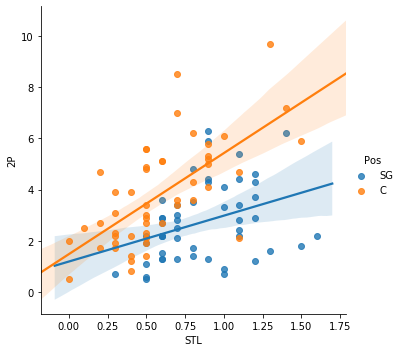

In [8]:
sns.lmplot(x="STL", y="2P", data=basketball, hue='Pos')

## 2) 어시스트, 2점슛을 데이터 시각화

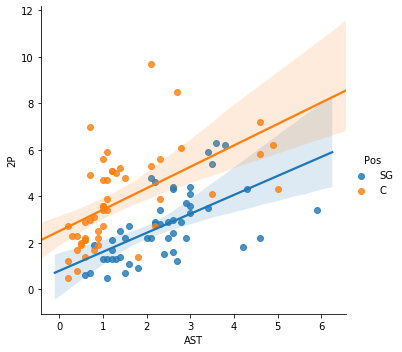

In [9]:
sns.lmplot(x="AST", y="2P", data=basketball, hue='Pos')

## 3) 블로킹, 3점슛을 데이터 시각화

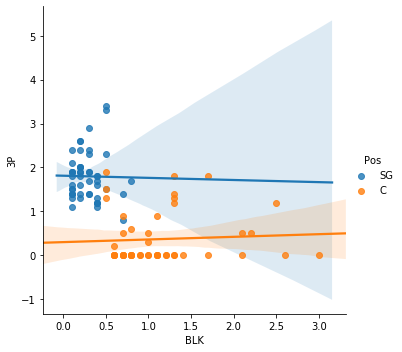

In [10]:
sns.lmplot(x="BLK", y="3P", data=basketball, hue='Pos')

## 4) 리바운드, 3점슛을 데이터 시각화

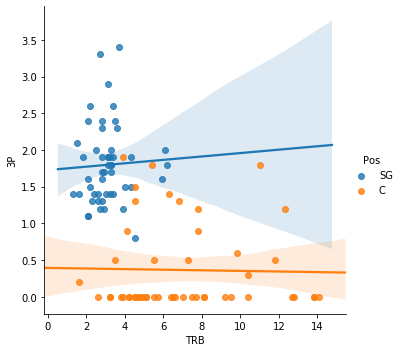

In [11]:
sns.lmplot(x="TRB", y="3P", data=basketball, hue='Pos')

In [12]:
basketball.corr()

,3P,2P,TRB,AST,STL,BLK
3P,1.000000,-0.094914,-0.498036,0.485010,0.353517,-0.534588
2P,-0.094914,1.000000,0.680882,0.396094,0.353558,0.482056
TRB,-0.498036,0.680882,1.000000,0.026689,0.130441,0.707542
AST,0.485010,0.396094,0.026689,1.000000,0.640802,-0.148161
STL,0.353517,0.353558,0.130441,0.640802,1.000000,-0.138208
BLK,-0.534588,0.482056,0.707542,-0.148161,-0.138208,1.000000


In [13]:
import matplotlib.pyplot as plt

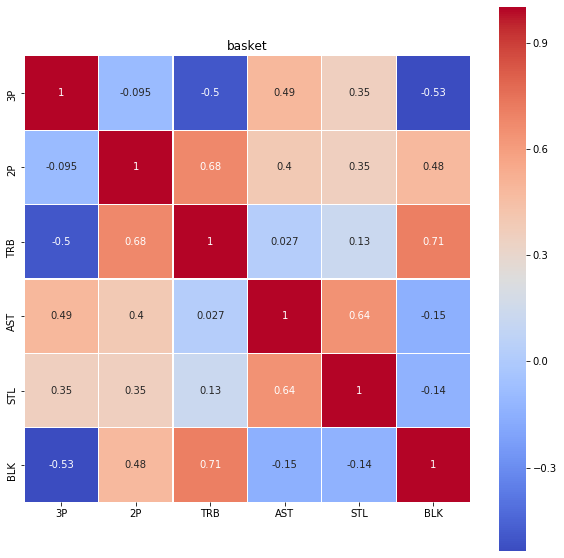

In [14]:
plt.figure(figsize=(10, 10))
ax = sns.heatmap(basketball.corr(), linewidths=0.01, square=True,
            annot=True, cmap=plt.cm.coolwarm, linecolor="white")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)
plt.title('basket')
plt.show()

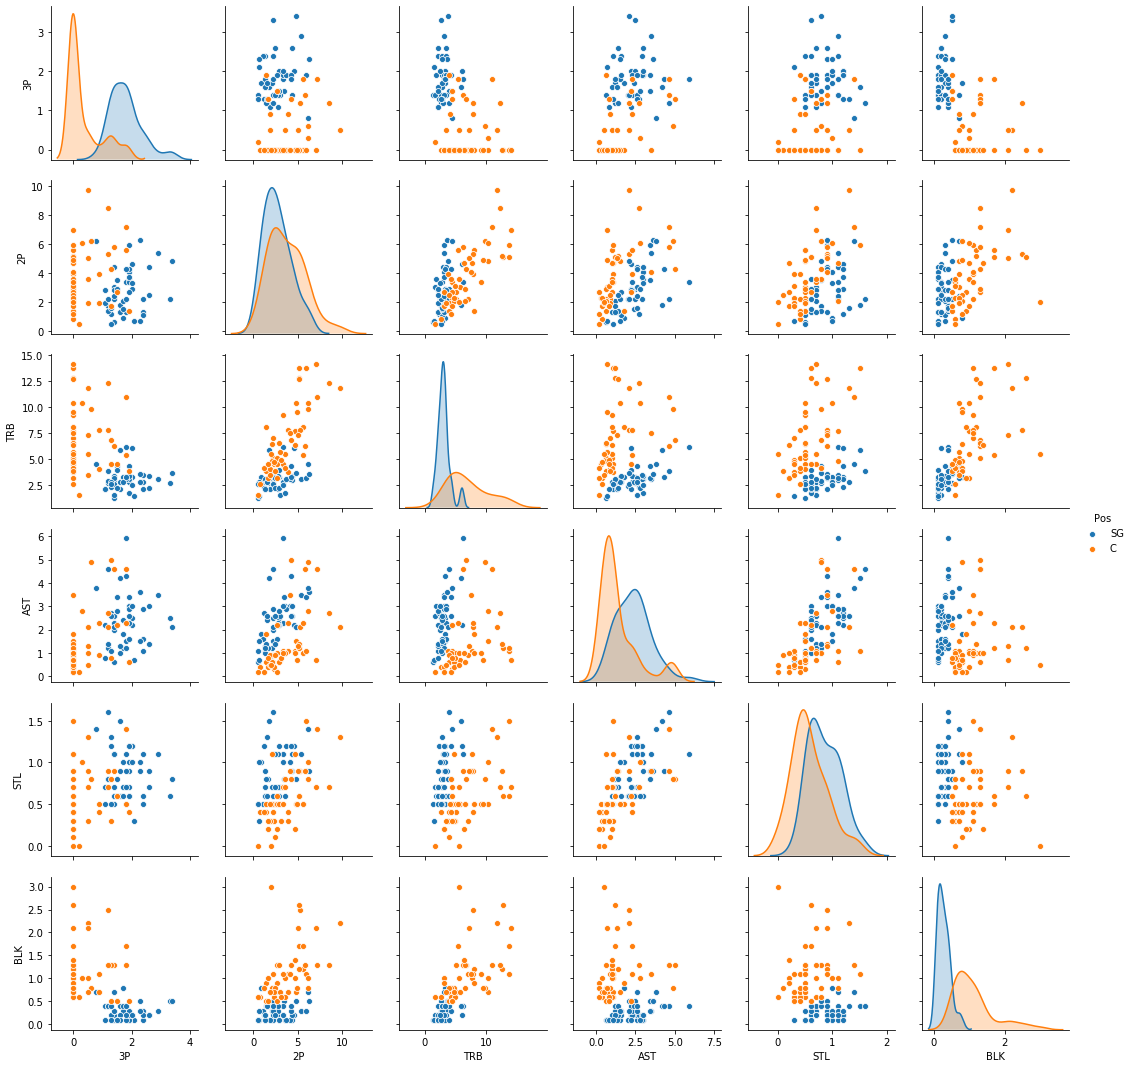

In [15]:
sns.pairplot(basketball, hue='Pos')

# 3. train, test 데이터를 나누어, 전체 내용과 각가 개수를 확인

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x = basketball.loc[: ,['3P','2P','TRB','AST','STL','BLK']]

In [18]:
y = basketball.loc[: , 'Pos']

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, shuffle=True, random_state=13)

In [20]:
x_train

,3P,2P,TRB,AST,STL,BLK
3,0.0,0.8,2.6,0.4,0.4,0.6
4,1.5,3.5,4.3,3.4,0.8,0.5
90,0.0,3.4,9.2,1.0,0.5,1.1
72,1.4,2.2,2.6,2.1,0.6,0.3
20,1.4,3.0,1.6,2.6,0.7,0.2
...,...,...,...,...,...,...
25,0.0,5.9,13.8,1.1,1.5,1.1
16,0.0,3.4,4.5,1.1,0.7,0.6
74,0.0,2.5,3.9,0.9,0.1,0.8
48,0.5,3.6,5.5,1.0,0.7,1.0


In [21]:
x_test

,3P,2P,TRB,AST,STL,BLK
37,0.9,1.9,4.1,0.9,0.5,0.7
62,0.0,4.7,6.4,1.0,0.2,1.4
83,0.5,1.9,3.5,0.5,0.3,0.7
14,2.0,2.9,3.3,2.5,1.2,0.2
43,0.0,2.7,5.1,1.0,0.5,1.3
9,0.0,2.2,7.0,0.9,0.3,1.1
44,0.0,1.7,3.2,0.4,0.2,1.0
31,0.9,3.9,7.8,2.3,0.4,1.1
69,0.0,1.2,4.2,0.2,0.4,0.8
57,0.0,3.0,5.7,0.7,0.5,0.7


# 4. 교차검증(cross-validation)을 통해  
# KNN, SVM, RandomForest,DecisionTree 중 최적의 모델을 선정  
## K-fold를 사용

In [22]:
from sklearn.model_selection import cross_val_score

### 1) SVM

In [23]:
clf = SVC()

In [24]:
clf.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [25]:
scores_svc = cross_val_score(clf, x_train, y_train, cv = 10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

In [26]:
scores_svc

array([0.88888889, 0.77777778, 0.77777778, 1.        , 1.        ,
       1.        , 1.        , 0.85714286, 1.        , 1.        ])

In [27]:
scores_svc.mean()

0.9301587301587301

### 2) KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
knn = KNeighborsClassifier(n_neighbors=3)

In [30]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [31]:
y_pred = knn.predict(x_test)

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
print('정답률: ', accuracy_score(y_test, y_pred))

정답률:  0.95


In [34]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           C       1.00      0.93      0.97        15\n          SG       0.83      1.00      0.91         5\n\n    accuracy                           0.95        20\n   macro avg       0.92      0.97      0.94        20\nweighted avg       0.96      0.95      0.95        20\n'

In [35]:
scores_knn = cross_val_score(knn, x_train, y_train, cv = 10)

In [36]:
scores_knn

array([0.77777778, 0.88888889, 0.77777778, 1.        , 1.        ,
       1.        , 1.        , 0.85714286, 1.        , 1.        ])

In [37]:
scores_knn.mean()

0.9301587301587301

## 3) DecisionTree

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=13)
tree_clf.fit(x_train, y_train)

print('Scroe :', format(tree_clf.score(x_train,y_train)))

Scroe : 1.0


In [40]:
scores_tree = cross_val_score(tree_clf, x_train, y_train, cv = 10)

In [41]:
scores_tree

array([0.77777778, 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.85714286, 0.85714286, 1.        , 1.        ])

In [42]:
scores_tree.mean()

0.9492063492063492

## 4) RandomForest

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
clf_rf = RandomForestClassifier()

In [45]:
scores_rf = cross_val_score(clf_rf, x_train, y_train, cv=10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

In [46]:
scores_rf

array([0.77777778, 1.        , 0.88888889, 1.        , 1.        ,
       1.        , 1.        , 0.85714286, 1.        , 1.        ])

In [47]:
scores_rf.mean()

0.9523809523809523

# 5. Grid-Search를 통해 4번에서 선정한 모델의 최적의 하이퍼 파라메터 값을 찾아 훈련시키세요

In [48]:
from sklearn.model_selection import KFold, GridSearchCV

In [49]:
kfold = KFold(n_splits=10, shuffle=True, random_state=0)

In [50]:
values = [0.001,0.01,0.1,1,10,100]

In [51]:
param_grid = [
    {'kernel':['rbf'], 'C':values, 'gamma':values},
    {'kernel':['linear'], 'C':values}
]

In [52]:
grid_search = GridSearchCV(clf, param_grid, cv=kfold)

In [53]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['rbf']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [54]:
grid_search.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [55]:
grid_search.best_score_

0.975

In [56]:
grid_search.score(x_test, y_test)

1.0

In [57]:
param_grid_knn = {
    'n_neighbors' : [3,5,7,9],
    'weights' : ['uniform','distance'],
    'metric' : ['euclidean','manhattan']
}

In [58]:
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=kfold)

In [59]:
grid_search_knn

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=3, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [60]:
gs_result = grid_search_knn.fit(x_train, y_train)

In [61]:
gs_result.best_params_

{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}

In [62]:
gs_result.best_score_

0.9625

In [63]:
gs_result.score(x_test, y_test)

0.95

In [191]:
param_grid_rf = {
    'max_depth': [2, 3, 4, 5],
    'max_features': ['auto'],
    'n_estimators': [50,100,200],
    'criterion' :['gini', 'entropy']
}

In [192]:
rf = RandomForestClassifier()

In [193]:
grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_grid_rf, 
                          cv = 10, n_jobs = -1)

In [180]:
# basketball_rf = basketball

In [181]:
# tmp = []
# for i in basketball_rf['Pos']:
#     if i == 'SG':
#         tmp.append(0)
#     else:
#         tmp.append(1)

In [182]:
# basketball_rf['Pos'] = tmp

In [183]:
# basketball_rf

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,1,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,1,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,1,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,1,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,1,1.5,3.5,4.3,3.4,0.8,0.5
...,...,...,...,...,...,...,...,...
95,Nikola Vucevic,1,0.3,6.1,10.4,2.8,1.0,1.0
96,Dwyane Wade,1,0.8,6.2,4.5,3.8,1.4,0.7
97,Dion Waiters,1,1.8,4.3,3.3,4.3,0.9,0.4
98,Hassan Whiteside,1,0.0,7.0,14.1,0.7,0.7,2.1


In [184]:
# basketball_rf['Pos'] = np.where(basketball_rf['Pos'] == 'SG',0,1) 

In [194]:
y = basketball_rf.loc[: , 'Pos']

In [195]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, shuffle=True, random_state=13)

In [196]:
grid_search_rf.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [197]:
grid_search_rf.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'auto',
 'n_estimators': 50}

In [198]:
grid_search_rf.best_score_

1.0

In [199]:
grid_search_rf.score(x_test,y_test)

1.0

# 6. accuracy를 구하고, recall, precision, f1-score를 report하시오

In [143]:
rf.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [144]:
y_pred = rf.predict(x_test)

In [145]:
accuracy_score(y_test, y_pred)

1.0

In [146]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



# 7. 위 과정을 [3P, BLK], [3P,BLK, TRB] 각각 진행하여 비교해보시오

# 8. 각 단계에서의 인사이트를 주석으로 정리